In [1]:
import networkx as nx

from models import RandomWalk, PearsonRandomWalk, RandomWalkOnGraph
from list_3.models import random_graph, watts_strogatz, barabasi_albert

import matplotlib.pyplot as plt
import numpy as np

## 1. Simulate a random walk of an agent on a square lattice. The program should take a snapshot of the lattice in every time step and save it to a jpg or png file. These files should then be used to generate a movie (avi or animated gif).

In [2]:
walk = RandomWalk()
position_list = walk.generate(starting_position=(3, 3), num_of_steps=10)

position_list

[(3.0, 3.0),
 (3.0, 2.0),
 (4.0, 2.0),
 (4.0, 3.0),
 (5.0, 3.0),
 (4.0, 3.0),
 (4.0, 2.0),
 (4.0, 1.0),
 (3.0, 1.0),
 (2.0, 1.0),
 (2.0, 2.0)]

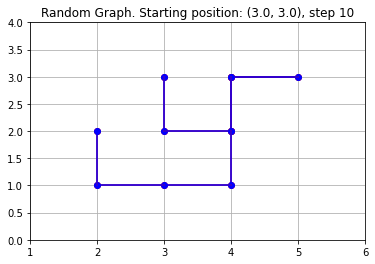

In [3]:
walk.save_walk_to_gif()
# change that there

![SegmentLocal](data/RandomWalk.gif "segment")

## 2. Write a computer program to simulate Pearson’s random walk in the plane, where the steps have constant length a = 1 and uniformly distributed random angles. By simulating many long walks of N steps (e.g. $N = 1000$) starting from the origin, compute and plot normalized histograms (i.e. the PDFs) of $A_N$ , the fraction of time steps when the walker is in right half plane $(x > 0)$ and of $B_N$ , the fraction of time the walker is in the first quadrant $(x > 0, y > 0)$. The expected values are clearly $A_N$ $i = \frac{1}{2}$ and $B_N$ $i = \frac{1}{4}$, but what are the most probable values? Plot several trajectories to illustrate your results.


In [4]:
walk = PearsonRandomWalk()
position_list = walk.generate(starting_position=(0, 0), num_of_steps=10)

position_list

[(0.0, 0.0),
 (0.9466865164541584, -0.32215623471211996),
 (0.04183799449859715, -0.7478898983033802),
 (0.24288127706939766, -1.7274722575428456),
 (-0.6912058053330151, -1.3704269908203357),
 (-1.40873721637066, -2.066953138336943),
 (-1.7127268863035825, -1.1142778103400053),
 (-1.621534889742425, -0.1184444810307328),
 (-2.3518600405612258, -0.8015441619569476),
 (-2.8865241282467142, 0.04352051801698453),
 (-3.8758046607611814, 0.18954800853809436)]

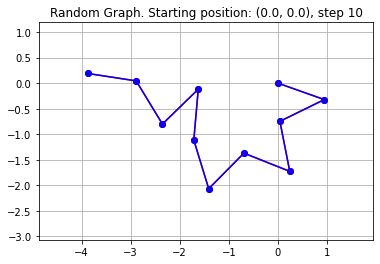

In [5]:
walk.save_walk_to_gif()

![SegmentLocal](data/PearsonRandomWalk.gif "segment")

statistics

In [6]:
 a_n, b_n = walk.get_stats(num_of_trajectories=1000, num_of_steps=1000)

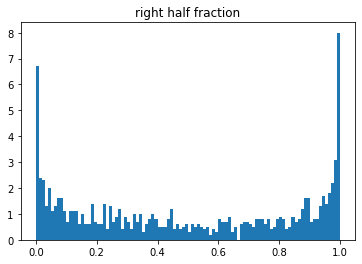

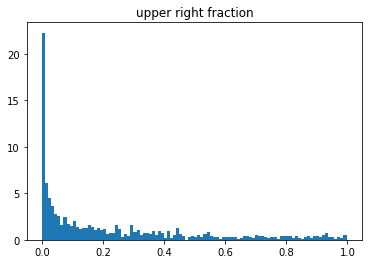

In [7]:
plt.figure()
plt.hist(a_n,bins=100, density=True)
plt.title('right half fraction')
plt.show()

plt.figure()
plt.hist(b_n, bins=100, density=True)
plt.title('upper right fraction')
plt.show()

In [8]:
print(f'right half fraction EX: {np.mean(a_n)}')
print(f'upper right fraction EX: {np.mean(b_n)}')

right half fraction EX: 0.49774899999999994
upper right fraction EX: 0.223709


## 3. Write a program that. . .
* will illustrate a random walk on a given graph (avi or animated gif),
* for a given origin node will estimate average hitting times of all other nodes.
## Compare the results for graphs of different topologies. Set N = 20 for visualization purposes and N = 100 otherwise.

In [6]:
def avg_hitting_time(walk: RandomWalkOnGraph, mc: int, max_iter: int = 1000) -> dict:
    """ function calculating avg hitting time for <mc> monte carlo trajectories. """
    stats = walk.get_stats(max_iter=max_iter)

    for _ in range(mc-1):
        new_stats = walk.get_stats(max_iter=max_iter)
        stats = {key: val + new_stats[key] for key, val in stats.items()}

    return {key: val/mc for key, val in stats.items()}

Starting with: random_graph(n=20,p=0.1).
20 steps.

In [34]:
n=20
p=0.1

walk = RandomWalkOnGraph()

# generate and load random graph
graph = random_graph(n=n, p=p)
walk.network = graph

# generate walk
position_list = walk.generate(starting_position=0, num_of_steps=20)
print(position_list)

[0, 5, 9, 11, 9, 5, 0, 5, 10, 5, 10, 12, 10, 12, 17, 12, 17, 12, 14, 12, 17]


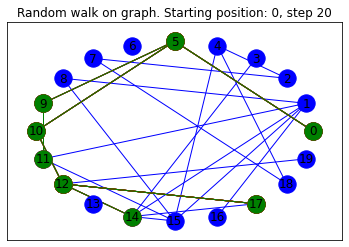

In [35]:
# save walk
walk.save_walk_to_gif(filename=f'random_graph_n{n}_p{p}')

In [24]:
print(f'random graph, n={n}, p={p}')

random graph, n=20, p=0.1


![SegmentLocal](data/random_graph_n20_p0.1.gif "segment")

Calculating average hitting time

In [36]:
mc = 1000
avg_hit = avg_hitting_time(walk=walk, mc=mc)
avg_hit

{1: 20.931,
 2: 87.229,
 3: 65.579,
 4: 56.937,
 5: 1.0,
 6: inf,
 7: 99.085,
 8: 35.576,
 9: 17.634,
 10: 18.27,
 11: 20.562,
 12: 21.695,
 13: inf,
 14: 18.858,
 15: 19.501,
 16: 64.458,
 17: 36.409,
 18: 87.755,
 19: 68.852}

Let's calculate it again for n=100, p=1/2 and 1000 monte carlo trajectories.

In [16]:
n=100
p=0.5
mc=1000
walk = RandomWalkOnGraph()

graph = random_graph(n=n, p=p)
walk.network = graph

avg_hit = avg_hitting_time(walk=walk, mc=mc, max_iter=3000)
avg_hit

{1: 122.442,
 2: 111.507,
 3: 120.457,
 4: 102.038,
 5: 94.815,
 6: 107.069,
 7: 103.343,
 8: 99.105,
 9: 100.495,
 10: 90.847,
 11: 94.74,
 12: 118.176,
 13: 109.598,
 14: 96.572,
 15: 94.889,
 16: 101.067,
 17: 120.667,
 18: 100.512,
 19: 103.1,
 20: 120.567,
 21: 88.08,
 22: 93.127,
 23: 124.766,
 24: 92.614,
 25: 94.697,
 26: 92.455,
 27: 96.865,
 28: 96.411,
 29: 84.303,
 30: 111.344,
 31: 92.847,
 32: 100.775,
 33: 100.224,
 34: 105.893,
 35: 93.404,
 36: 96.487,
 37: 105.087,
 38: 89.73,
 39: 90.439,
 40: 86.94,
 41: 83.211,
 42: 117.665,
 43: 94.379,
 44: 125.881,
 45: 103.02,
 46: 76.259,
 47: 86.908,
 48: 85.003,
 49: 96.581,
 50: 101.272,
 51: 107.357,
 52: 100.026,
 53: 110.635,
 54: 107.672,
 55: 97.829,
 56: 103.993,
 57: 96.858,
 58: 110.061,
 59: 92.84,
 60: 114.064,
 61: 98.688,
 62: 80.423,
 63: 94.916,
 64: 95.301,
 65: 113.635,
 66: 112.277,
 67: 94.5,
 68: 102.632,
 69: 99.341,
 70: 104.296,
 71: 78.196,
 72: 104.779,
 73: 96.335,
 74: 109.61,
 75: 86.296,
 76: 90.

now repeat for Watts-Strogatz.

n=20, k=4, beta=1/2

In [3]:
n=20
k=4
beta=0.5

walk = RandomWalkOnGraph()

# generate and load graph
graph = watts_strogatz(n=n, k=k, beta=beta)
walk.network = graph

# generate walk
position_list = walk.generate(starting_position=0, num_of_steps=20)
print(position_list)

[0, 7, 0, 3, 1, 3, 5, 19, 18, 17, 16, 10, 13, 14, 15, 14, 12, 14, 13, 14, 15]


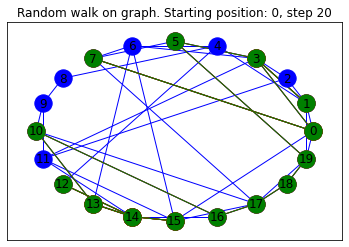

In [6]:
# save walk
walk.save_walk_to_gif(filename=f'watts-strogatz_n{n}_k{k}_beta{beta}')

In [8]:
print(f'Watts-Strogatz, n={n}, k={k}, beta={beta}')

Watts-Strogatz, n=20, k=4, beta=0.5


![SegmentLocal](data/watts-strogatz_n20_k4_beta0.5.gif "segment")

In [8]:
mc = 1000
avg_hit = avg_hitting_time(walk=walk, mc=mc)
avg_hit

{1: 14.603,
 2: 32.873,
 3: 12.526,
 4: 29.133,
 5: 28.471,
 6: 18.544,
 7: 19.275,
 8: 61.294,
 9: 40.975,
 10: 29.633,
 11: 21.543,
 12: 53.143,
 13: 36.224,
 14: 24.864,
 15: 16.737,
 16: 35.087,
 17: 16.358,
 18: 46.667,
 19: 15.28}

In [17]:
n=100
k=10
beta=0.5

walk = RandomWalkOnGraph()

# generate and load graph
graph = watts_strogatz(n=n, k=k, beta=beta)
walk.network = graph

avg_hit = avg_hitting_time(walk=walk, mc=1000, max_iter= 3000)
avg_hit

{1: 85.532,
 2: 95.737,
 3: 123.089,
 4: 80.883,
 5: 110.544,
 6: 143.501,
 7: 92.736,
 8: 108.344,
 9: 84.884,
 10: 125.184,
 11: 142.886,
 12: 122.047,
 13: 139.146,
 14: 126.285,
 15: 147.816,
 16: 118.669,
 17: 107.564,
 18: 102.664,
 19: 153.702,
 20: 150.149,
 21: 96.164,
 22: 129.85,
 23: 104.235,
 24: 124.382,
 25: 124.561,
 26: 96.404,
 27: 115.755,
 28: 123.663,
 29: 138.024,
 30: 94.266,
 31: 128.781,
 32: 118.972,
 33: 130.175,
 34: 124.317,
 35: 102.63,
 36: 136.539,
 37: 97.582,
 38: 119.519,
 39: 120.375,
 40: 104.399,
 41: 109.236,
 42: 156.403,
 43: 123.661,
 44: 102.291,
 45: 138.014,
 46: 110.037,
 47: 71.935,
 48: 142.025,
 49: 120.047,
 50: 164.346,
 51: 85.703,
 52: 135.407,
 53: 160.468,
 54: 78.296,
 55: 103.941,
 56: 112.074,
 57: 119.504,
 58: 142.398,
 59: 86.85,
 60: 109.715,
 61: 126.574,
 62: 99.838,
 63: 135.779,
 64: 98.913,
 65: 143.095,
 66: 111.941,
 67: 87.738,
 68: 112.998,
 69: 141.205,
 70: 111.863,
 71: 97.829,
 72: 147.397,
 73: 130.031,
 74: 10

and for Barabasi-Albert:


In [2]:
n=20
m=4


walk = RandomWalkOnGraph()

# generate and load graph
graph = barabasi_albert(n=n, m=m)
walk.network = graph

# generate walk
position_list = walk.generate(starting_position=0, num_of_steps=20)
print(position_list)

[0, 16, 17, 7, 9, 8, 13, 8, 15, 2, 10, 14, 10, 8, 5, 11, 19, 12, 9, 14, 10]


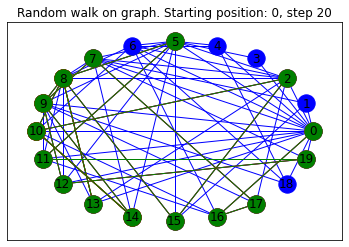

In [3]:
# save walk
walk.save_walk_to_gif(filename=f'barabasi-albert_n{n}_m{m}')

In [4]:
print(f'Barabasi-Albert, n={n}, m={m}')

Barabasi-Albert, n=20, m=4


![SegmentLocal](data/barabasi-albert_n20_m4.gif "segment")

In [7]:
mc = 1000
avg_hit = avg_hitting_time(walk=walk, mc=mc)
avg_hit

{1: 44.095,
 2: 14.934,
 3: 65.069,
 4: 32.942,
 5: 10.754,
 6: 14.833,
 7: 15.939,
 8: 13.891,
 9: 12.952,
 10: 21.519,
 11: 22.223,
 12: 26.239,
 13: 32.515,
 14: 36.521,
 15: 35.156,
 16: 26.062,
 17: 34.38,
 18: 32.923,
 19: 34.695}

In [8]:
n = 100
k = 10
beta = 0.5

walk = RandomWalkOnGraph()

# generate and load graph
graph = watts_strogatz(n=n, k=k, beta=beta)
walk.network = graph

avg_hit = avg_hitting_time(walk=walk, mc=1000, max_iter=3000)
avg_hit

{1: 62.6,
 2: 98.58,
 3: 96.814,
 4: 71.126,
 5: 139.182,
 6: 98.23,
 7: 126.719,
 8: 102.877,
 9: 144.477,
 10: 129.696,
 11: 98.461,
 12: 186.759,
 13: 104.987,
 14: 108.215,
 15: 95.644,
 16: 90.886,
 17: 88.714,
 18: 88.075,
 19: 108.735,
 20: 142.749,
 21: 121.204,
 22: 101.004,
 23: 124.479,
 24: 101.032,
 25: 104.05,
 26: 86.358,
 27: 112.536,
 28: 141.037,
 29: 90.428,
 30: 138.412,
 31: 89.776,
 32: 148.24,
 33: 115.824,
 34: 140.119,
 35: 86.74,
 36: 121.608,
 37: 137.024,
 38: 130.817,
 39: 140.033,
 40: 142.502,
 41: 103.149,
 42: 110.077,
 43: 111.839,
 44: 117.364,
 45: 113.495,
 46: 137.473,
 47: 161.206,
 48: 140.917,
 49: 110.084,
 50: 226.38,
 51: 108.572,
 52: 120.358,
 53: 105.293,
 54: 86.623,
 55: 150.337,
 56: 92.784,
 57: 122.916,
 58: 126.379,
 59: 142.618,
 60: 102.562,
 61: 123.51,
 62: 102.238,
 63: 90.587,
 64: 140.45,
 65: 107.284,
 66: 140.346,
 67: 113.368,
 68: 106.432,
 69: 103.211,
 70: 131.927,
 71: 133.1,
 72: 116.271,
 73: 165.943,
 74: 91.663,
 75